In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('500_Reddit_users_posts_labels.csv')

# Separate posts and labels into lists
posts = df['Post'].tolist()
all_labels = df['Label'].str.split(',').tolist()

# Create a set to store all unique labels
unique_labels = set()

# Iterate through all labels and add them to the set
for labels in all_labels:
    unique_labels.update(labels)

# Convert the set of unique labels back to a sorted list
unique_labels = sorted(unique_labels)

# Create a dictionary to store labels for each post
post_labels = {}

# Iterate through posts and corresponding labels
for post, labels in zip(posts, all_labels):
    # Create a dictionary to store binary values for each label
    label_dict = {label: 1 if label in labels else 0 for label in unique_labels}
    post_labels[post] = label_dict

# Convert the dictionary to a DataFrame
labels_df = pd.DataFrame.from_dict(post_labels, orient='index')

# Display the DataFrame
labels_df
# Save the DataFrame to a CSV file
labels_df.to_csv('processed_data.csv', index=False)



In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.optimizers import Adam, Adagrad

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Text to analyze
text = "I don't have anyone to talk to and I don't know what to do anymore"

# Analyze sentiment
scores = sid.polarity_scores(text)

# Print sentiment scores
print("Sentiment Scores:", scores)

# Get positive score
positive_score = scores['pos']

print("Positive Score:", positive_score)

Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Positive Score: 0.0


In [33]:
df=pd.read_csv('processed_data.csv')

In [34]:
# Function to calculate sentiment scores for 'Post' column
def calculate_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neg'], scores['neu']

# Calculate sentiment scores for 'Post' column
df[['compound_score', 'positive_score', 'negative_score', 'neutral_score']] = df['Post'].apply(calculate_sentiment_scores).apply(pd.Series)

# Display the DataFrame with sentiment scores
df


,Post,Attempt,Behavior,Ideation,Indicator,Supportive,compound_score,positive_score,negative_score,neutral_score
0,"['Its not a viable option, and youll be leavin...",0,0,0,0,1,-0.7131,0.083,0.137,0.780
1,['It can be hard to appreciate the notion that...,0,0,1,0,0,0.9611,0.165,0.156,0.680
2,"['Hi, so last night i was sitting on the ledge...",0,1,0,0,0,0.9865,0.157,0.096,0.747
3,['I tried to kill my self once and failed badl...,1,0,0,0,0,0.3371,0.154,0.142,0.705
4,['Hi NEM3030. What sorts of things do you enjo...,0,0,1,0,0,0.9890,0.263,0.110,0.627
...,...,...,...,...,...,...,...,...,...,...
345,"['Ive been where you are, and I know it doesnt...",0,0,1,0,0,0.9998,0.193,0.100,0.706
346,"['I am really sorry, truly. I agree with SW. I...",0,0,0,0,1,0.9992,0.188,0.132,0.679
347,"['Hey.Im here,Silly.When youre ready. ', 'I de...",0,0,0,1,0,0.9999,0.188,0.125,0.687
348,['You obviously care for your mother quite dee...,0,0,0,0,1,0.9987,0.154,0.061,0.785


In [35]:
df.columns

Index(['Post', 'Attempt', 'Behavior', 'Ideation', 'Indicator', 'Supportive',
       'compound_score', 'positive_score', 'negative_score', 'neutral_score'],
      dtype='object')

In [36]:
# Calculate the correlation matrix
correlation_matrix = df[['compound_score', 'positive_score', 'negative_score', 'neutral_score']].corr()
# Define the threshold for correlation
threshold = 0.5

# Get the upper triangular part of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop the columns with high correlation
df.drop(columns=to_drop, inplace=True)

# Display the DataFrame after dropping highly correlated columns
df


,Post,Attempt,Behavior,Ideation,Indicator,Supportive,compound_score,positive_score,negative_score,neutral_score
0,"['Its not a viable option, and youll be leavin...",0,0,0,0,1,-0.7131,0.083,0.137,0.780
1,['It can be hard to appreciate the notion that...,0,0,1,0,0,0.9611,0.165,0.156,0.680
2,"['Hi, so last night i was sitting on the ledge...",0,1,0,0,0,0.9865,0.157,0.096,0.747
3,['I tried to kill my self once and failed badl...,1,0,0,0,0,0.3371,0.154,0.142,0.705
4,['Hi NEM3030. What sorts of things do you enjo...,0,0,1,0,0,0.9890,0.263,0.110,0.627
...,...,...,...,...,...,...,...,...,...,...
345,"['Ive been where you are, and I know it doesnt...",0,0,1,0,0,0.9998,0.193,0.100,0.706
346,"['I am really sorry, truly. I agree with SW. I...",0,0,0,0,1,0.9992,0.188,0.132,0.679
347,"['Hey.Im here,Silly.When youre ready. ', 'I de...",0,0,0,1,0,0.9999,0.188,0.125,0.687
348,['You obviously care for your mother quite dee...,0,0,0,0,1,0.9987,0.154,0.061,0.785


In [37]:
from sklearn.preprocessing import MaxAbsScaler

# Assuming 'data' is your DataFrame with the features to be scaled

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Select the columns to be scaled
columns_to_scale = ['compound_score', 'positive_score', 'negative_score', 'neutral_score']  # Replace with your column names

# Fit the scaler to the selected columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,Post,Attempt,Behavior,Ideation,Indicator,Supportive,compound_score,positive_score,negative_score,neutral_score
0,"['Its not a viable option, and youll be leavin...",0,0,0,0,1,-0.7131,0.083,0.416413,0.780
1,['It can be hard to appreciate the notion that...,0,0,1,0,0,0.9611,0.165,0.474164,0.680
2,"['Hi, so last night i was sitting on the ledge...",0,1,0,0,0,0.9865,0.157,0.291793,0.747
3,['I tried to kill my self once and failed badl...,1,0,0,0,0,0.3371,0.154,0.431611,0.705
4,['Hi NEM3030. What sorts of things do you enjo...,0,0,1,0,0,0.9890,0.263,0.334347,0.627
...,...,...,...,...,...,...,...,...,...,...
345,"['Ive been where you are, and I know it doesnt...",0,0,1,0,0,0.9998,0.193,0.303951,0.706
346,"['I am really sorry, truly. I agree with SW. I...",0,0,0,0,1,0.9992,0.188,0.401216,0.679
347,"['Hey.Im here,Silly.When youre ready. ', 'I de...",0,0,0,1,0,0.9999,0.188,0.379939,0.687
348,['You obviously care for your mother quite dee...,0,0,0,0,1,0.9987,0.154,0.185410,0.785


#1) Attempt

In [41]:
# Split data into features and targets
X = df[[ 'compound_score', 'positive_score', 'negative_score', 'neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df[ 'Attempt']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model0 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model0.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model0.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model0.predict(X_test)>0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
2/2 [==============================] - 1s 212ms/step - loss: 0.6488 - accuracy: 0.7421 - val_loss: 0.6214 - val_accuracy: 0.9286
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6257 - accuracy: 0.7738 - val_loss: 0.5966 - val_accuracy: 0.9286
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.6005 - accuracy: 0.8056 - val_loss: 0.5698 - val_accuracy: 0.9286
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5576 - accuracy: 0.8690 - val_loss: 0.5417 - val_accuracy: 0.9286
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5409 - accuracy: 0.8929 - val_loss: 0.5129 - val_accuracy: 0.9286
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5105 - accuracy: 0.8968 - val_loss: 0.4833 - val_accuracy: 0.9286
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.4919 - accuracy: 0.8770 - val_loss: 0.4530 - val_accuracy: 0.9286
Epoch 8/50
2/2 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#2) Behavior

In [49]:
# Split data into features and targets
X = df[[ 'compound_score', 'positive_score', 'negative_score', 'neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df[ 'Behavior']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model1.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model1.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model1.predict(X_test)>0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
2/2 [==============================] - 2s 325ms/step - loss: 0.6690 - accuracy: 0.6071 - val_loss: 0.6536 - val_accuracy: 0.8571
Epoch 2/50
2/2 [==============================] - 0s 44ms/step - loss: 0.6544 - accuracy: 0.6429 - val_loss: 0.6306 - val_accuracy: 0.8571
Epoch 3/50
2/2 [==============================] - 0s 59ms/step - loss: 0.6153 - accuracy: 0.7063 - val_loss: 0.6093 - val_accuracy: 0.8571
Epoch 4/50
2/2 [==============================] - 0s 50ms/step - loss: 0.5969 - accuracy: 0.7381 - val_loss: 0.5889 - val_accuracy: 0.8571
Epoch 5/50
2/2 [==============================] - 0s 64ms/step - loss: 0.5935 - accuracy: 0.7937 - val_loss: 0.5683 - val_accuracy: 0.8571
Epoch 6/50
2/2 [==============================] - 0s 51ms/step - loss: 0.5632 - accuracy: 0.8135 - val_loss: 0.5451 - val_accuracy: 0.8571
Epoch 7/50
2/2 [==============================] - 0s 54ms/step - loss: 0.5418 - accuracy: 0.8095 - val_loss: 0.5250 - val_accuracy: 0.8571
Epoch 8/50
2/2 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3) Ideation

In [50]:
# Split data into features and targets
X = df[[ 'compound_score', 'positive_score', 'negative_score', 'neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df[ 'Ideation']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model2.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model2.predict(X_test)>0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
2/2 [==============================] - 3s 552ms/step - loss: 0.7327 - accuracy: 0.4246 - val_loss: 0.7007 - val_accuracy: 0.3929
Epoch 2/50
2/2 [==============================] - 0s 77ms/step - loss: 0.7098 - accuracy: 0.4762 - val_loss: 0.6913 - val_accuracy: 0.6071
Epoch 3/50
2/2 [==============================] - 0s 72ms/step - loss: 0.6891 - accuracy: 0.5238 - val_loss: 0.6842 - val_accuracy: 0.6071
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6973 - accuracy: 0.5317 - val_loss: 0.6796 - val_accuracy: 0.6071
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6701 - accuracy: 0.5833 - val_loss: 0.6761 - val_accuracy: 0.6071
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6692 - accuracy: 0.5794 - val_loss: 0.6736 - val_accuracy: 0.6071
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6782 - accuracy: 0.5913 - val_loss: 0.6728 - val_accuracy: 0.6071
Epoch 8/50
2/2 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4) Indicator

In [51]:
# Split data into features and targets
X = df[[ 'compound_score', 'positive_score', 'negative_score', 'neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df[ 'Indicator']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model3.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model0.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model3.predict(X_test)>0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
2/2 [==============================] - 0s 93ms/step - loss: 0.5681 - accuracy: 0.7778 - val_loss: 0.4410 - val_accuracy: 0.8214
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5759 - accuracy: 0.7778 - val_loss: 0.4416 - val_accuracy: 0.8214
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5658 - accuracy: 0.7778 - val_loss: 0.4435 - val_accuracy: 0.8214
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5717 - accuracy: 0.7778 - val_loss: 0.4466 - val_accuracy: 0.8214
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.5654 - accuracy: 0.7778 - val_loss: 0.4505 - val_accuracy: 0.8214
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5374 - accuracy: 0.7778 - val_loss: 0.4542 - val_accuracy: 0.8214
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5543 - accuracy: 0.7778 - val_loss: 0.4585 - val_accuracy: 0.8214
Epoch 8/50
2/2 [===========

#5) Supportive


In [52]:
# Split data into features and targets
X = df[[ 'compound_score', 'positive_score', 'negative_score', 'neutral_score']]  # Replace 'feature1', 'feature2', ... with your feature columns
y = df[ 'Supportive']     # Replace 'target1', 'target2', ... with your target columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Reshape the data for 1D CNN
# X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the ANN model with increased layers
model4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if necessary
model4.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model4.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model4.predict(X_test)>0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Epoch 1/50
2/2 [==============================] - 2s 350ms/step - loss: 0.7876 - accuracy: 0.2540 - val_loss: 0.7149 - val_accuracy: 0.2143
Epoch 2/50
2/2 [==============================] - 0s 77ms/step - loss: 0.7422 - accuracy: 0.3532 - val_loss: 0.6924 - val_accuracy: 0.5357
Epoch 3/50
2/2 [==============================] - 0s 73ms/step - loss: 0.7153 - accuracy: 0.4563 - val_loss: 0.6742 - val_accuracy: 0.7857
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6948 - accuracy: 0.4841 - val_loss: 0.6597 - val_accuracy: 0.7857
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6677 - accuracy: 0.6230 - val_loss: 0.6473 - val_accuracy: 0.7857
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.6344 - accuracy: 0.7381 - val_loss: 0.6345 - val_accuracy: 0.7857
Epoch 7/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6186 - accuracy: 0.7778 - val_loss: 0.6212 - val_accuracy: 0.7857
Epoch 8/50
2/2 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Concatenating All Models

In [53]:
from keras.layers import Concatenate
from keras.models import Model

# Assuming your models are stored in a list called model_list
model_list = [model0, model1, model2, model3, model4]

# Create an input layer for each model
input_layers = [model.input for model in model_list]

# Concatenate the output of each model
merged = Concatenate()(input_layers)

# Create a new model with the concatenated output
model_combine = Model(inputs=input_layers, outputs=merged)

# Compile the combined model
model_combine.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
predictions = []
for model in model_list:
    predictions.append((model.predict(X_test) > 0.5).astype("int32"))

y_pred_combined = np.concatenate(predictions, axis=-1)

final_predictions = np.mean(y_pred_combined, axis=-1)
final_binary_predictions = (final_predictions > 0.5).astype("int32")

# Evaluate the combined predictions
accuracy = accuracy_score(y_test, final_binary_predictions)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, final_binary_predictions))

3/3 [==============================] - 0s 6ms/step
Accuracy: 0.757
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        53
           1       0.00      0.00      0.00        17

    accuracy                           0.76        70
   macro avg       0.38      0.50      0.43        70
weighted avg       0.57      0.76      0.65        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 4ms/step


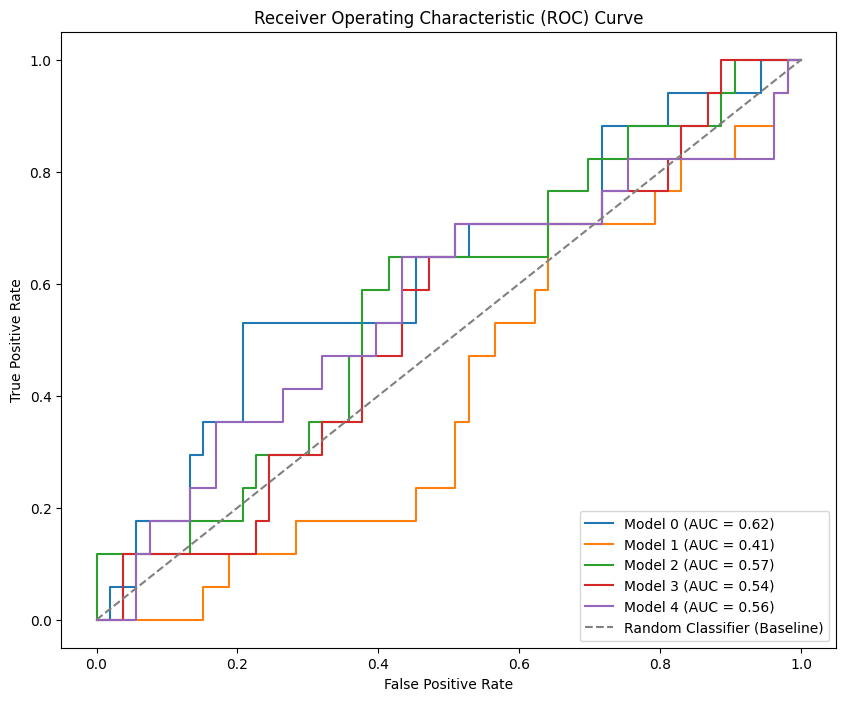

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a list or dictionary containing your Keras Sequential models model0 to model8
models = [model0, model1, model2, model3, model4]  # Update with your actual models

# Assuming X_test and y_test are your test features and target labels respectively
# Initialize a figure
plt.figure(figsize=(10, 8))

# Iterate through each model
for i, model in enumerate(models):
    # Make predictions on the test set
    y_pred_proba = model.predict(X_test)  # Assuming your models have a predict method

    # Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate area under ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Model {i} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (Baseline)')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()